# <div style="display: flex; justify-content: center; background-color:#edf2f4; font-family:Times New Roman; color:#d90429; padding: 10px; line-height: 1; border-radius: 70px; margin-bottom: 0em; text-align: center; font-size: 80px; border-style: solid; border-color: #edf2f4; font-weight: bold;"> Hand Gesture Recognition</div>

In [132]:
import os
import zipfile
import shutil
import random   
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

<center> <span style="font-family:Comic Sans MS"> <span style="padding:5px; display:fill; border-radius:20px 50px; background-color:#edf2f4; font-size:200%; font-weight: 500; color:#d90429; overflow:hidden;">`Extracting Files`</span>

In [2]:
archive_path = "archive.zip"
extract_to = "Data"

with zipfile.ZipFile(archive_path, "r") as zip_ref:
    zip_ref.extractall(extract_to)

print(f"Files extracted to: {extract_to} Successfully" )

Files extracted to: Data Successfully


<center> <span style="font-family:Comic Sans MS"> <span style="padding:5px; display:fill; border-radius:20px 50px; background-color:#edf2f4; font-size:200%; font-weight: 500; color:#d90429; overflow:hidden;">`Data Structure`</span>

In [3]:
for root, dirs, files in os.walk(extract_to):
    print(f"Directory: {root}")
    print(f"Contains sub-directories: {dirs}")
    print(f"Contains files: {len(files)} files")
    print("-" * 50)

Directory: Data
Contains sub-directories: ['leapGestRecog']
Contains files: 0 files
--------------------------------------------------
Directory: Data\leapGestRecog
Contains sub-directories: ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', 'leapGestRecog']
Contains files: 0 files
--------------------------------------------------
Directory: Data\leapGestRecog\00
Contains sub-directories: ['01_palm', '02_l', '03_fist', '04_fist_moved', '05_thumb', '06_index', '07_ok', '08_palm_moved', '09_c', '10_down']
Contains files: 0 files
--------------------------------------------------
Directory: Data\leapGestRecog\00\01_palm
Contains sub-directories: []
Contains files: 200 files
--------------------------------------------------
Directory: Data\leapGestRecog\00\02_l
Contains sub-directories: []
Contains files: 200 files
--------------------------------------------------
Directory: Data\leapGestRecog\00\03_fist
Contains sub-directories: []
Contains files: 200 files
------------------

In [4]:
base_dir = "Data\leapGestRecog"
redundent_dir = os.path.join(base_dir, "leapGestRecog")

if os.path.exists(redundent_dir):
    shutil.rmtree(redundent_dir)
    print(f"Removed Redundent Directory: {redundent_dir}")
else:
    print(f"No Redundent Directory Found At: {redundent_dir}")

Removed Redundent Directory: Data\leapGestRecog\leapGestRecog


<center> <span style="font-family:Comic Sans MS"> <span style="padding:5px; display:fill; border-radius:20px 50px; background-color:#edf2f4; font-size:200%; font-weight: 500; color:#d90429; overflow:hidden;">`Become One With The Data (visualize it)`</span>

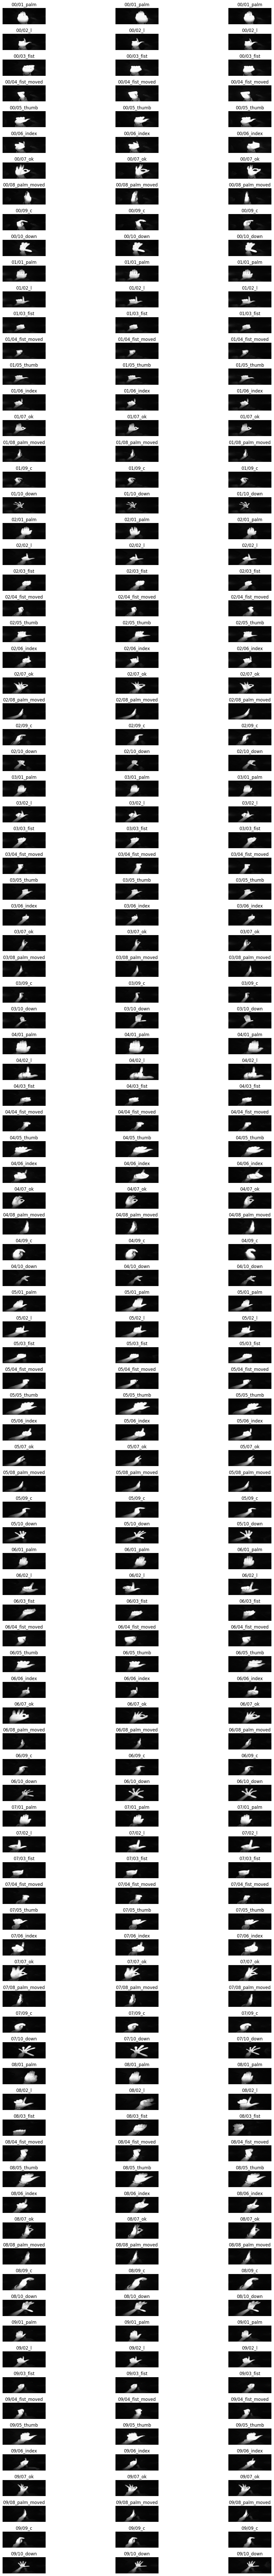

In [5]:
main_folders = os.listdir(base_dir)

plt.figure(figsize=(15, len(main_folders) * 10))

image_count = 1

for folder in main_folders:
    folder_path = os.path.join(base_dir, folder)
    gesture_folders = os.listdir(folder_path)
    
    for gesture in gesture_folders:
        gesture_path = os.path.join(folder_path, gesture)
        images = os.listdir(gesture_path)
        selected_images = random.sample(images, 3)

        for image_name in selected_images:
            image_path = os.path.join(gesture_path, image_name)

            img = Image.open(image_path)
            plt.subplot(len(main_folders) * 10, 3, image_count)
            plt.imshow(img, cmap="gray")
            plt.title(f'{folder}/{gesture}')
            plt.axis("off")

            image_count += 1

plt.tight_layout()
plt.show()

<center> <span style="font-family:Comic Sans MS"> <span style="padding:5px; display:fill; border-radius:20px 50px; background-color:#edf2f4; font-size:200%; font-weight: 500; color:#d90429; overflow:hidden;">`Preprocess The Data'</span>

In [41]:
train_data = image_dataset_from_directory(
    base_dir,
    label_mode="int",
    image_size=(240, 600), 
    batch_size=32, 
    validation_split=0.2,
    subset="training",
    color_mode="grayscale",
    seed=42,
    )


valid_data = image_dataset_from_directory(
    base_dir, 
    label_mode="int",
    image_size=(240, 600),
    batch_size=32,
    validation_split=0.2,
    subset="validation",
    color_mode="grayscale",
    seed=42
)

test_data = image_dataset_from_directory(
    base_dir, 
    label_mode="int",
    image_size=(240, 600), 
    batch_size=32, 
    shuffle=False, 
    color_mode="grayscale"
)

Found 20000 files belonging to 10 classes.
Using 16000 files for training.
Found 20000 files belonging to 10 classes.
Using 4000 files for validation.
Found 20000 files belonging to 10 classes.


<center> <span style="font-family:Comic Sans MS"> <span style="padding:5px; display:fill; border-radius:20px 50px; background-color:#edf2f4; font-size:200%; font-weight: 500; color:#d90429; overflow:hidden;">`Creating The Model'</span>

In [7]:
tf.random.set_seed(42)

model = Sequential([
    Conv2D(32, 5, activation="relu", strides=2, input_shape=(240, 600, 1)), 
    MaxPool2D(pool_size=2),
    Conv2D(64, 3, activation="relu"), 
    MaxPool2D(pool_size=2),
    Conv2D(64, 3, activation="relu"), 
    MaxPool2D(pool_size=2),
    Flatten(), 
    Dense(128, activation="relu"),   
    Dense(10, activation="softmax")
])

model.compile(
    loss=sparse_categorical_crossentropy, 
    optimizer=Adam(), 
    metrics=["accuracy"]
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 118, 298, 32)   │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 59, 149, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 57, 147, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 28, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 26, 71, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 35, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 29120)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,727,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,785,034 (14.44 MB)

 Trainable params: 3,785,034 (14.44 MB)

 Non-trainable params: 0 (0.00 B)

<center> <span style="font-family:Comic Sans MS"> <span style="padding:5px; display:fill; border-radius:20px 50px; background-color:#edf2f4; font-size:200%; font-weight: 500; color:#d90429; overflow:hidden;">`Model Structure'</span>

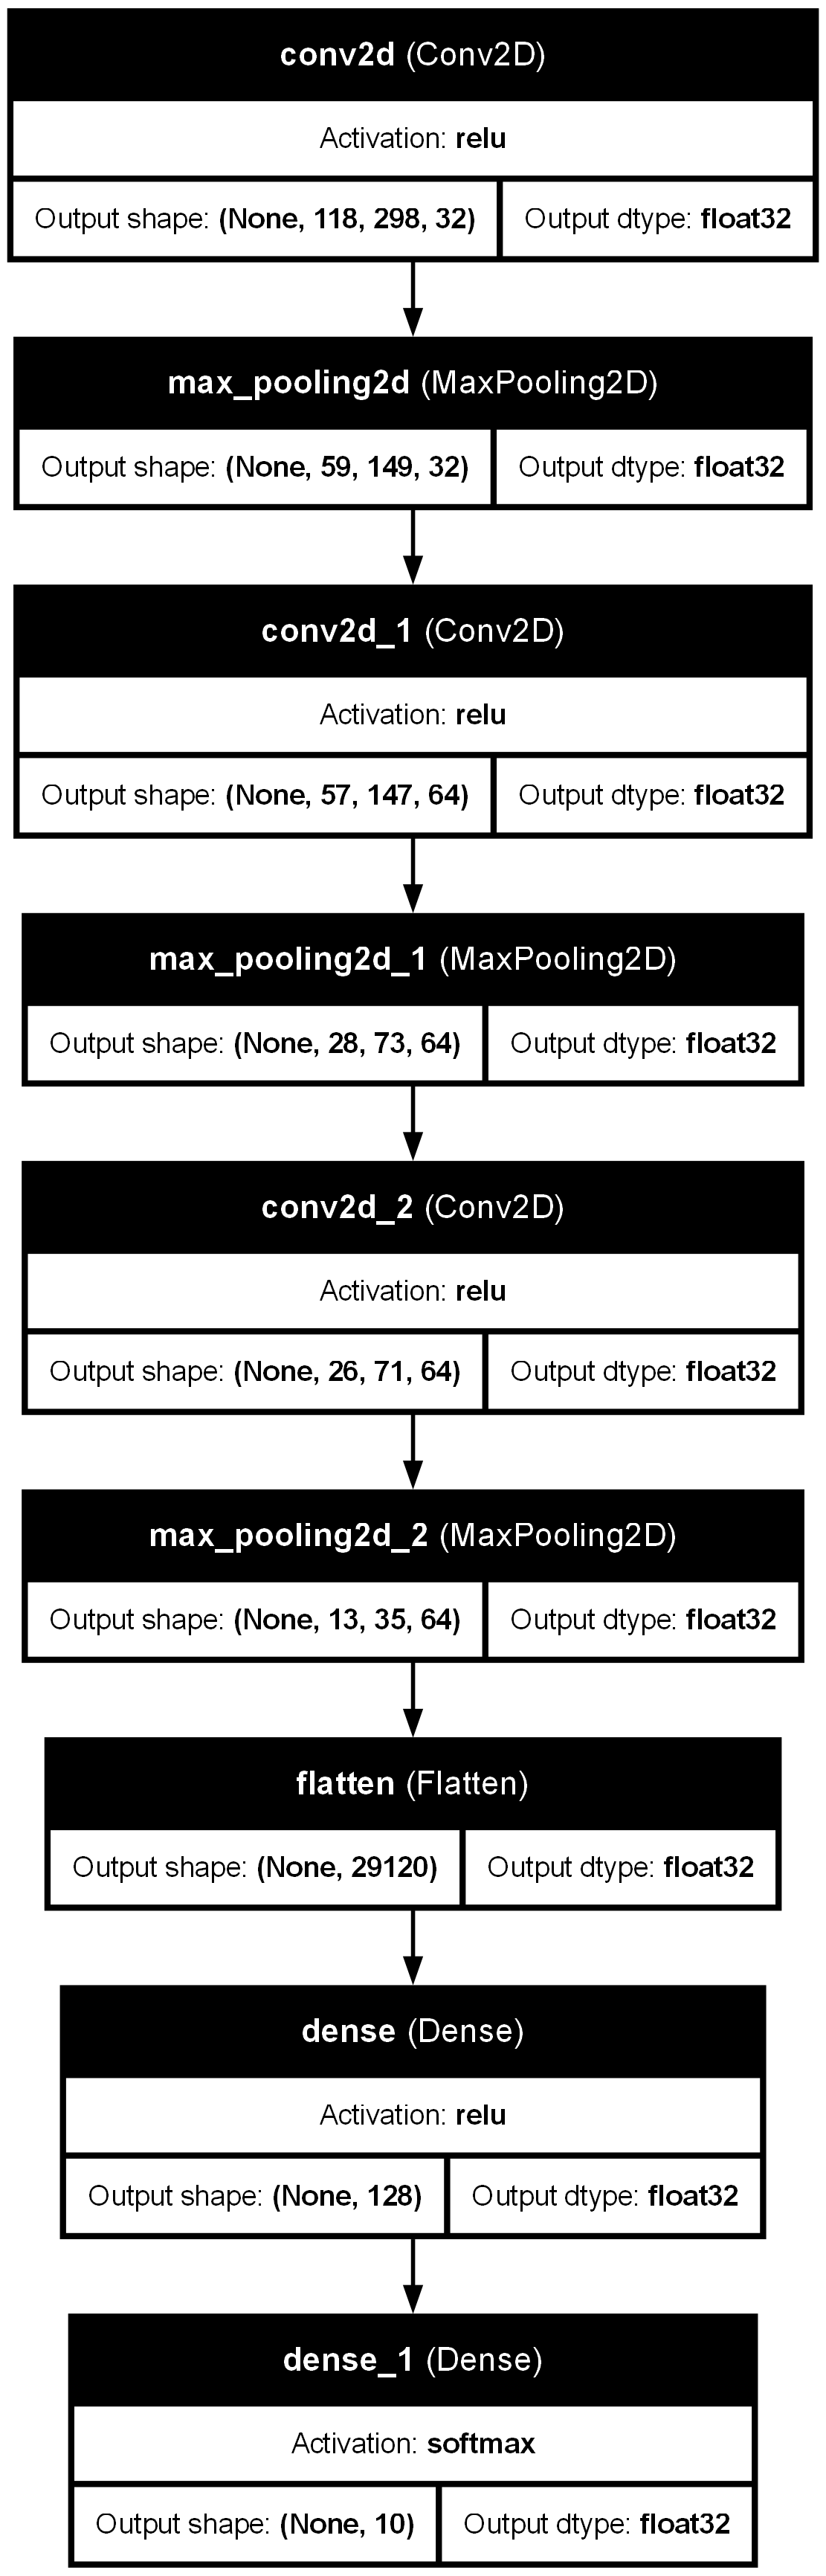

In [136]:
plot_model(
    model, 
    show_shapes=True, 
    show_dtype=True, 
    show_layer_names=True, 
    show_layer_activations=True,
    
    )

<center> <span style="font-family:Comic Sans MS"> <span style="padding:5px; display:fill; border-radius:20px 50px; background-color:#edf2f4; font-size:200%; font-weight: 500; color:#d90429; overflow:hidden;">`Fitting The Model'</span>

In [8]:
model_history = model.fit(
    train_data,
    epochs=10, 
    validation_data=valid_data,
    verbose=1
    )

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 108s 213ms/step - accuracy: 0.8642 - loss: 1.8320 - val_accuracy: 0.9860 - val_loss: 0.0248
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 108s 216ms/step - accuracy: 0.9907 - loss: 0.0199 - val_accuracy: 0.9085 - val_loss: 0.5080
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 116s 232ms/step - accuracy: 0.9786 - loss: 0.0757 - val_accuracy: 0.9858 - val_loss: 0.0232
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 110s 220ms/step - accuracy: 0.9923 - loss: 0.0145 - val_accuracy: 0.9898 - val_loss: 0.0175
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 109s 218ms/step - accuracy: 0.9931 - loss: 0.0129 - val_accuracy: 0.9883 - val_loss: 0.0190
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 110s 220ms/step - accuracy: 0.9929 - loss: 0.0120 - val_accuracy: 0.9862 - val_loss: 0.0188
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 109s 217ms/step - accuracy: 0.9928 - loss: 0.0120 - val_accuracy: 0.9893 - val_loss: 0.0178
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 110s 219ms/step - accuracy: 0.9928 -

<center> <span style="font-family:Comic Sans MS"> <span style="padding:5px; display:fill; border-radius:20px 50px; background-color:#edf2f4; font-size:200%; font-weight: 500; color:#d90429; overflow:hidden;">`Accuracy & Loss Comparison'</span>

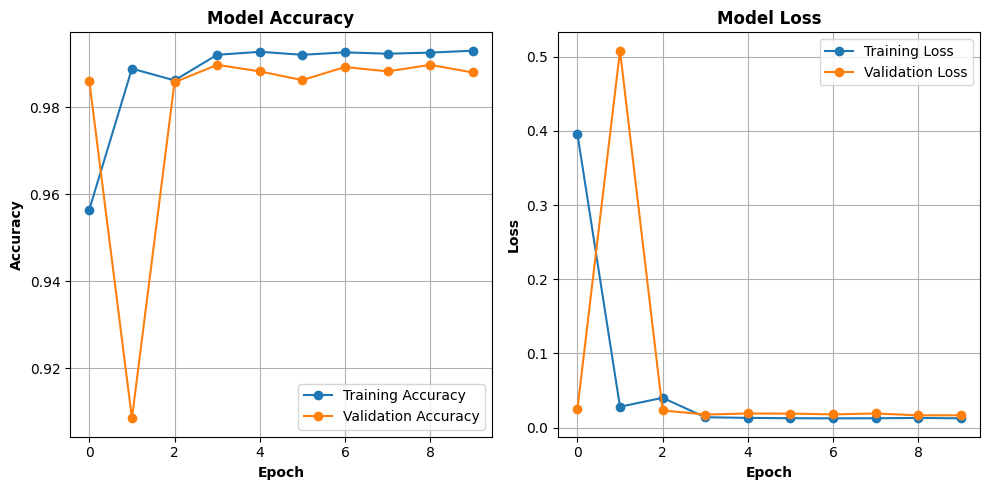

In [40]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(model_history.history["accuracy"], label="Training Accuracy", marker="o")
plt.plot(model_history.history["val_accuracy"], label="Validation Accuracy", marker="o")
plt.title("Model Accuracy", fontweight="bold")
plt.xlabel("Epoch", fontweight="bold")
plt.ylabel("Accuracy", fontweight="bold")
plt.legend(loc="best")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(model_history.history["loss"], label="Training Loss", marker="o")
plt.plot(model_history.history["val_loss"], label="Validation Loss", marker="o")
plt.title("Model Loss", fontweight="bold")
plt.xlabel("Epoch", fontweight="bold")
plt.ylabel("Loss", fontweight="bold")
plt.legend(loc="best")
plt.grid(True)

plt.tight_layout()
plt.show()

<center> <span style="font-family:Comic Sans MS"> <span style="padding:5px; display:fill; border-radius:20px 50px; background-color:#edf2f4; font-size:200%; font-weight: 500; color:#d90429; overflow:hidden;">`Model Evaluation'</span>

In [42]:
test_loss, test_accuracy = model.evaluate(test_data)

625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.9930 - loss: 0.0119


In [44]:
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Loss: {test_loss}")

Test Accuracy: 0.9915000200271606
Test Loss: 0.013128712773323059


In [45]:
probas = model.predict(test_data)

625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 74ms/step


array([[9.9999750e-01, 5.7104006e-07, 8.2762944e-07, ..., 9.4206172e-07,
        1.6150396e-07, 1.9654043e-09],
       [9.9988401e-01, 1.7812835e-07, 6.7853762e-07, ..., 3.1025329e-09,
        1.1698803e-06, 2.5124649e-05],
       [9.9988401e-01, 1.7812835e-07, 6.7853762e-07, ..., 3.1025329e-09,
        1.1698803e-06, 2.5124649e-05],
       ...,
       [1.5742078e-12, 3.7417094e-10, 4.6170710e-11, ..., 5.4619860e-09,
        3.3903995e-14, 1.0000000e+00],
       [5.4592941e-22, 2.0538455e-14, 1.6508997e-14, ..., 4.8944768e-09,
        1.6196448e-18, 1.0000000e+00],
       [4.3824224e-12, 8.3876561e-10, 1.5763098e-10, ..., 1.0822150e-08,
        6.6829375e-14, 1.0000000e+00]], dtype=float32)

In [47]:
predictions = np.argmax(probas, axis=1)

In [48]:
y_true = np.concatenate([y for x, y in test_data], axis=0)
y_true

array([0, 0, 0, ..., 9, 9, 9])

<center> <span style="font-family:Comic Sans MS"> <span style="padding:5px; display:fill; border-radius:20px 50px; background-color:#edf2f4; font-size:200%; font-weight: 500; color:#d90429; overflow:hidden;">`Classification Report'</span>

In [50]:
class_report = classification_report(y_true, predictions)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2000
           1       1.00      1.00      1.00      2000
           2       0.95      0.97      0.96      2000
           3       1.00      1.00      1.00      2000
           4       1.00      1.00      1.00      2000
           5       0.97      0.95      0.96      2000
           6       1.00      1.00      1.00      2000
           7       1.00      1.00      1.00      2000
           8       1.00      1.00      1.00      2000
           9       1.00      1.00      1.00      2000

    accuracy                           0.99     20000
   macro avg       0.99      0.99      0.99     20000
weighted avg       0.99      0.99      0.99     20000



<center> <span style="font-family:Comic Sans MS"> <span style="padding:5px; display:fill; border-radius:20px 50px; background-color:#edf2f4; font-size:200%; font-weight: 500; color:#d90429; overflow:hidden;">`Confusion Matrix'</span>

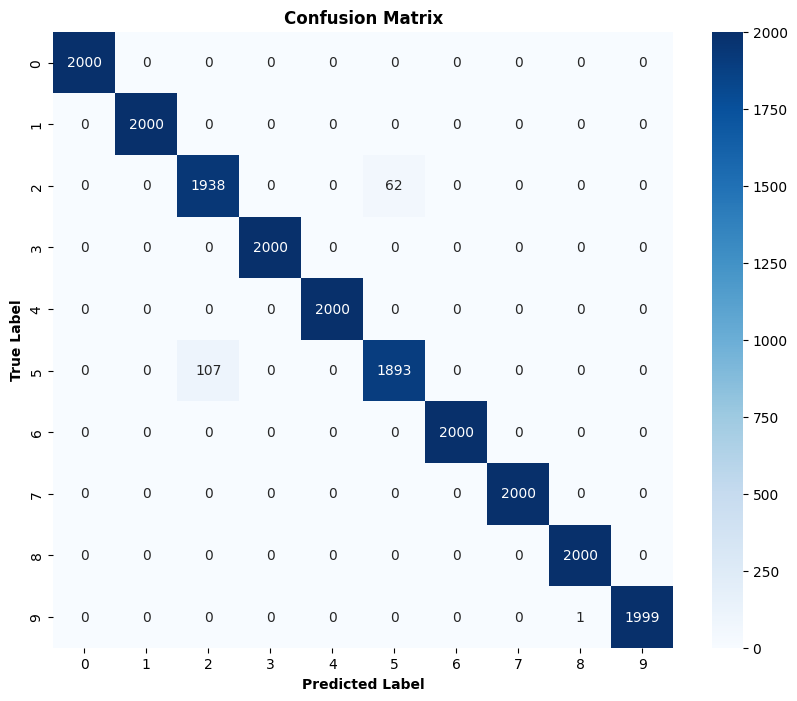

In [54]:
conf_matrix = confusion_matrix(y_true, predictions)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label', fontweight="bold")
plt.ylabel('True Label', fontweight="bold")
plt.title('Confusion Matrix', fontweight="bold")
plt.show()

<center> <span style="font-family:Comic Sans MS"> <span style="padding:5px; display:fill; border-radius:20px 50px; background-color:#edf2f4; font-size:200%; font-weight: 500; color:#d90429; overflow:hidden;">`Predicting A Random Image'</span>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


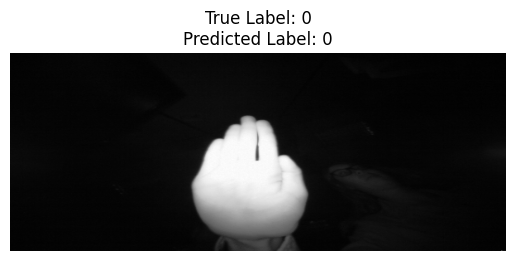

In [131]:
def predict_random_image(model, dataset, class_names):
    image_batch, label_batch = next(iter(dataset))
    random_index = random.randint(0, len(image_batch) - 1)
    random_image = image_batch[random_index]
    true_label = label_batch[random_index].numpy()
    image_for_prediction = np.expand_dims(random_image, axis=0)
    predictions = model.predict(image_for_prediction)
    predicted_label = np.argmax(predictions[0])

    plt.imshow(random_image.numpy().squeeze(), cmap='gray')
    plt.title(f"True Label: {class_names[true_label]}\nPredicted Label: {class_names[predicted_label]}")
    plt.axis('off')
    plt.show()

class_names = list(range(10))
predict_random_image(model, test_data, class_names)

<body>
    <center>
        <div style="font-family: Comic Sans MS; background-color: #edf2f4; color: #d90429; padding: 12px; line-height: 1; font-weight: bold; font-size: 50px; border-style: solid; border-color: dark green;">
            By: Mohamed Ghannnam
        </div>
    </center>
    <center>
        <div style="font-family: Trebuchet MS; background-color: #edf2f4; color: #d90429; padding: 12px; line-height: 1; font-weight: bold; font-size: 50px; border-style: solid; border-color: dark green;">
            Thank You!
        </div>
        <div style="font-family: Trebuchet MS; background-color: #edf2f4; color: #d90429; padding: 12px; line-height: 1; font-weight: bold; font-size: 50px; border-style: solid; border-color: dark green; margin-top: 20px;">
            <a href="https://www.linkedin.com/in/mohamedghannnam/" style="text-decoration: none; color: #d90429;">
                <i class="fa-brands fa-linkedin" style="font-size: 50px; vertical-align: middle; color: #d90429;"></i> Click Here ==> LinkedIn 
            </a>
        </div>
    </center>
</body>
